<a href="https://colab.research.google.com/github/alfie-agustin/Analisis-predictivo/blob/main/prediccioon_carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Falta

 - ordenar un poco mas los graficos
 - arrancar la explicacion
 - ver como hacer la regresion lineal
 - grafico tela araña
 - analisis NAs
 - Analisis outliers


***Hipotesis:***

1) La marca va a influenciar al precio

2) El tamaño de motor y caballos (cuanto mas) mas va a subir el precio

3) el tamaño del auto va a influenciar en el precio

4) el tipo de nafta va a influenciar en el precio








In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os as os
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/2022/Analisis predictivo/pricepred/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
df.dtypes


car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df[['Marca','Modelo']] = df.CarName.apply(lambda x: pd.Series(str(x).split(" ", 1)))

df[['Marca']] == Nissan # si la marca es Nissan, cambiarlo a nissan (la mayusc)

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Marca,Modelo
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


#DISTRIBUCION DE VARIABLES

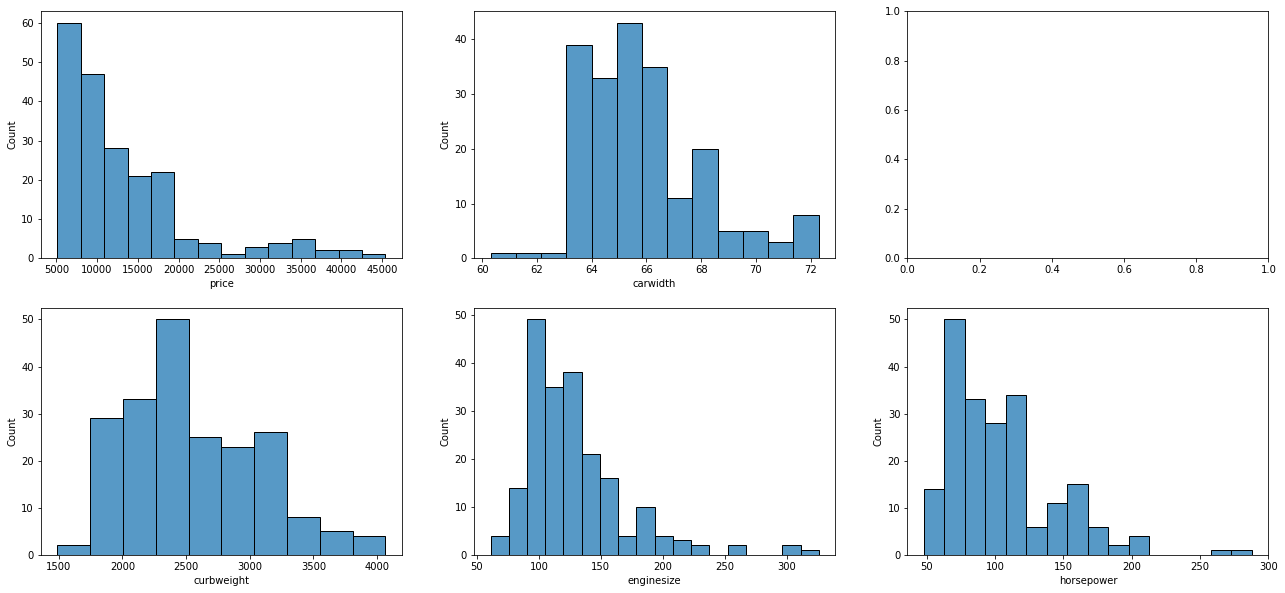

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

sns.histplot(data=df, x="price", ax=axs[0,0],multiple="stack")
sns.histplot(data=df, x="carwidth",  ax=axs[0,1],multiple="stack")
sns.histplot(data=df, x="curbweight",  ax=axs[1,0],multiple="stack")
sns.histplot(data=df, x="enginesize", ax=axs[1,1],multiple="stack")
sns.histplot(data=df, x="horsepower", ax=axs[1,2],multiple="stack")
plt.show()

#TEST DE NORMALIDAD PARA VARIABLE RESPUESTA


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


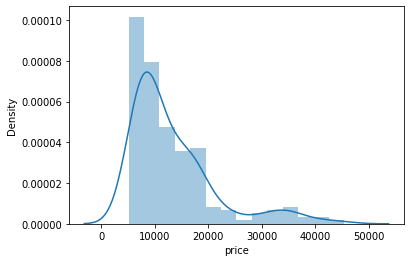

In [ ]:
sns.distplot(df.price) 

In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df.price)

print('stat: ', stat)
print('p value:', p)

if p > 0.05:
  print('probability gaussin')
else:
  print('probability not gaussian')  



stat:  0.8006654381752014
p value: 1.8491777441833604e-15
probability not gaussian


***CORRELACIONES***


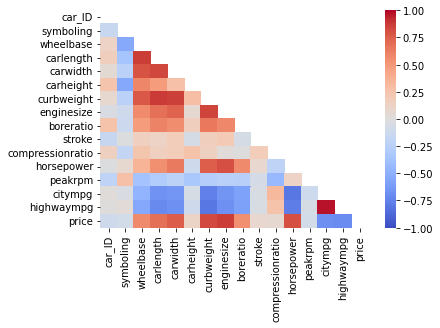

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = False
            , cmap = 'coolwarm', mask = mask)

#se puede ver una posible relacioin entre el precio con el ancho del auto, el peso, el tamaño de motor y los caballos de fuerza

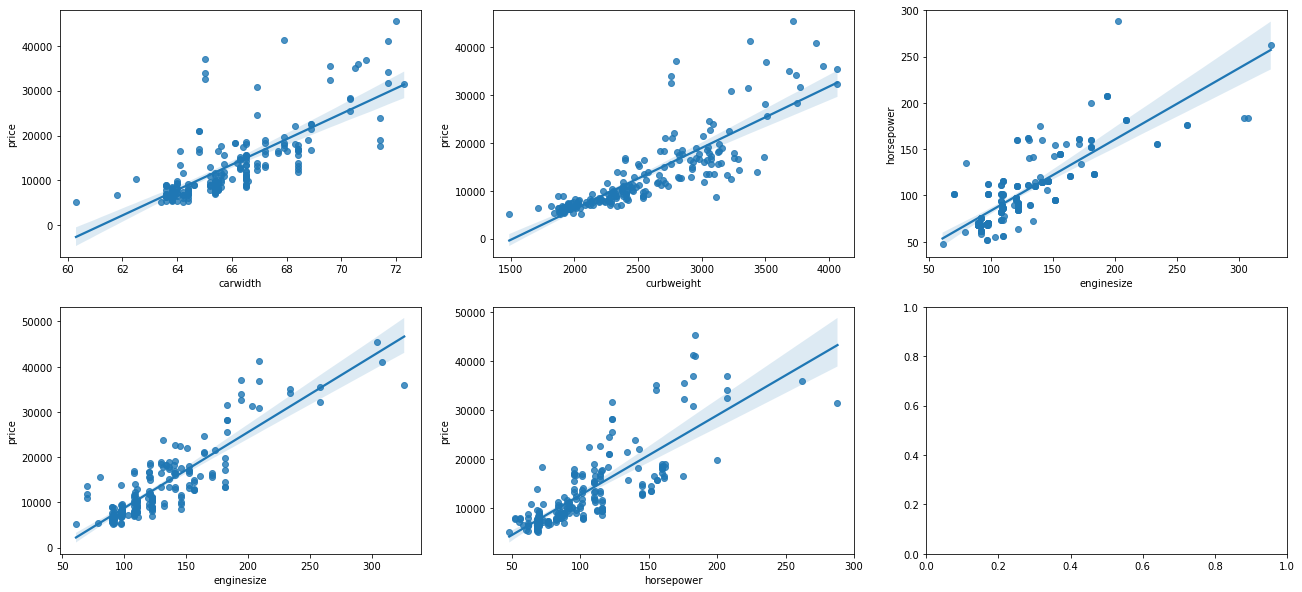

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

# Ponerle las correlaciones como titulos 

sns.regplot(x = df.carwidth, y = df.price, ax=axs[0,0], )
sns.regplot(x = df.curbweight, y = df.price, ax=axs[0,1])
sns.regplot(x = df.enginesize, y = df.horsepower, ax=axs[0, 2])

sns.regplot(x = df.enginesize, y = df.price, ax = axs[1,0])
sns.regplot(x = df.horsepower, y = df.price, ax = axs[1,1])
plt.show()

***SCATTER PLOTS PARA ENTENDER MEJOR EL TIPO DE CORR***

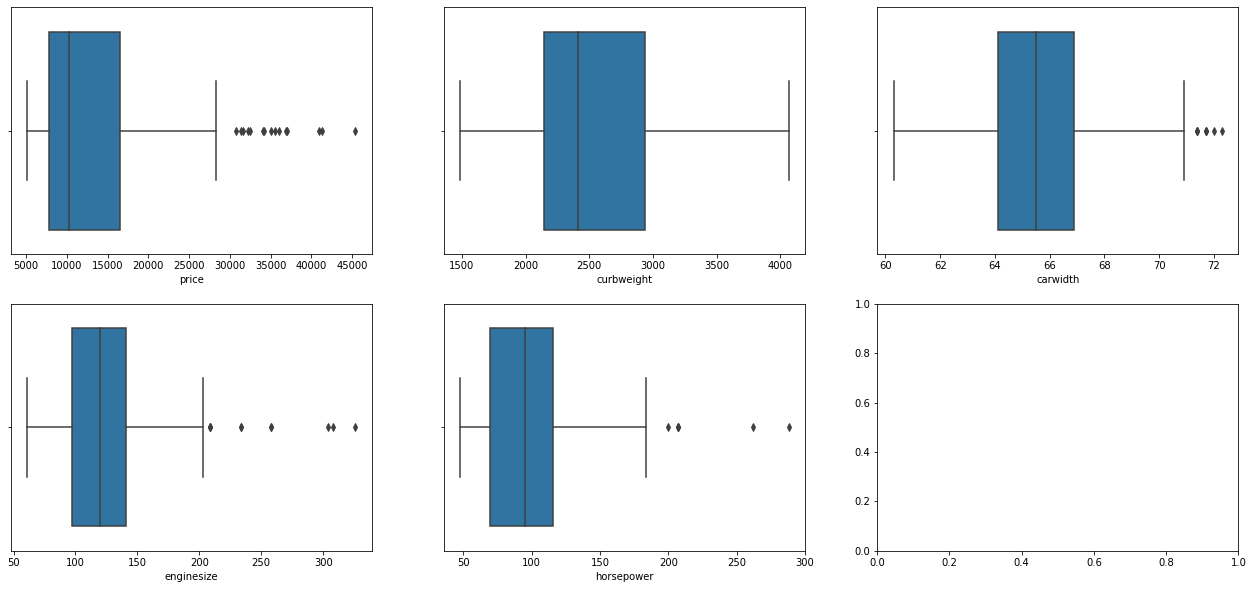

In [ ]:
#ANALISIS OUTLIERS

fig, axs = plt.subplots(2,3, figsize=(22, 10))



sns.boxplot(x=df.price, ax=axs[0,0]) #revisar como ver los outliers del precio, a quien corresponde
sns.boxplot(x=df.carwidth, ax=axs[0,2])
sns.boxplot(x=df.curbweight, ax=axs[0,1])
sns.boxplot(x=df.enginesize, ax = axs[1,0])
sns.boxplot(x=df.horsepower, ax = axs[1,1])
plt.show()




En todas las correlaciones se pueden ver correlaciones lineales, esto podria dar indicios de las variables que van a influir en la prediccioin


CATEGORICAS VS PRECIO

<BarContainer object of 205 artists>

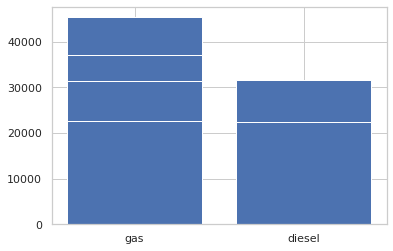

In [ ]:
plt.bar(df.fueltype, df.price, )

#los autos que usan diesel valen un 25% menos

<BarContainer object of 205 artists>

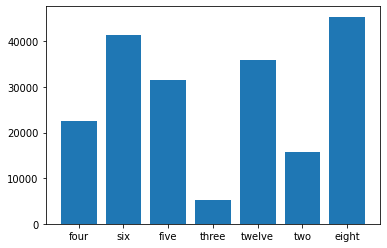

In [ ]:
plt.bar(df.cylindernumber, df.price)
# no se ve una relacion constante

#Marca auto

<BarContainer object of 205 artists>

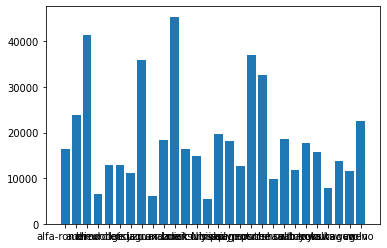

In [ ]:
plt.bar(df.Marca, df.price)

In [ ]:
info = df[["Marca", "price"]].groupby("Marca").agg(["mean", "count"]) 
# ver como ordenar por el mean y despues hacer un grafico del head, hacer rango precio ystat stuff para explicar q la marca influye (ej comparacion toyota con buick (mayor ventas va mayor precio prom))

price  mean     float64
       count      int64
dtype: object

#Regresion lineal


In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop(columns = ['price']).copy()
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20 )

print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(164, 27)
(164,)
(41, 27)
(41,)


(None, None)

#Arbol regresion

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
base_arbol = df[[
"wheelbase",
"carlength",
"carwidth",
"carheight",
"curbweight",
"enginesize",
"boreratio",
"stroke",
"compressionratio",
"horsepower",
"peakrpm",
"citympg",
"highwaympg",
"price"]]

In [ ]:
x1 = base_arbol.drop(columns = ['price']).copy()
y1 = base_arbol['price']

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.20 )

print(x_train1.shape), print(y_train1.shape)
print(x_test1.shape), print(y_test1.shape)

(164, 13)
(164,)
(41, 13)
(41,)


(None, None)

In [ ]:
x_train1.dtypes

wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
dtype: object

array([21485. , 19699. , 15690. ,  9279. ,  6095. ,  6189. ,  7299. ,
       14869. , 17075. ,  7957. , 14869. ,  6229. ,  8499. ,  8495. ,
        7463. ,  6649. , 45400. , 11259. ,  9639. ,  6529. , 11199. ,
        8358. , 17710. , 11259. ,  7609. , 14869. , 13415. ,  8495. ,
        8916.5, 16630. ,  8916.5, 21105. ,  7689. ,  5399. , 25552. ,
       15510. , 18420. ,  7957. ,  6692. ,  9538. , 15985. ])

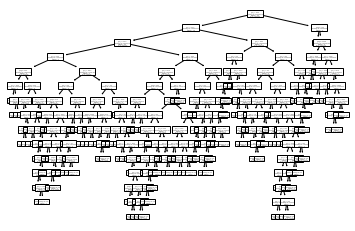

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


arbol = DecisionTreeRegressor()
arbol.fit(x_train1, y_train1)

tree.plot_tree(arbol)

In [ ]:
#Prediccion y score
arbol.predict(x_test1)
score = arbol.score(x_test1, y_test1)
print(score)

0.8921286649849282
